In [336]:
from pynq import Overlay
import struct
import numpy as np
from pynq import allocate

# import for image input
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

# Output webcam image as JPEG
%matplotlib inline 
from matplotlib import pyplot as plt

# grabs the bitstream for the base overlay
base = BaseOverlay("base.bit")

In [337]:
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
hdmi_out = base.video.hdmi_out
hdmi_out.configure(Mode,PIXEL_BGR)
hdmi_out.start()

In [338]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

In [339]:
import os
os.environ["OPENCV_LOG_LEVEL"]="SILENT"
# initialize camera from OpenCV
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(videoIn.isOpened()))

Capture device is open: True


In [350]:
# Capture webcam image
import numpy as np

ret, frame_vga = videoIn.read()

# Display webcam image via HDMI Out
if (ret):      
    outframe = hdmi_out.newframe()
    outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    hdmi_out.writeframe(outframe)
else:
    raise RuntimeError("Failed to read from camera.")

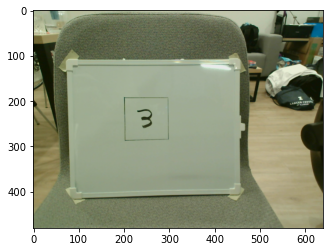

In [351]:
plt.imshow(frame_vga[:,:,[2,1,0]])
plt.show()

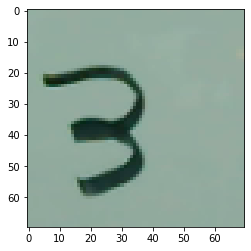

(70, 70, 3)
(70, 70, 3)
[240 240 240]


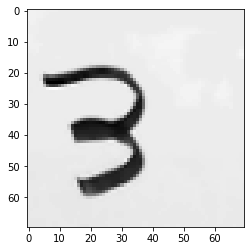

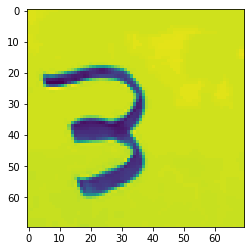

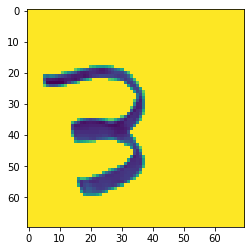

In [352]:
# crops the image to a 70 x 70 image of the digit
img_crop = frame_vga[200:270,225:295,:]

plt.imshow(img_crop)
plt.show()

print(img_crop.shape)

# convert image to grayscale and scale blacks and whites accordingly
img_crop_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

max_val = np.max(img_crop_gray)
min_val = np.min(img_crop_gray)

img_crop_gray_temp = img_crop_gray - min_val

shifted_max_val = np.max(img_crop_gray_temp)

img_crop_gray_fp = img_crop_gray_temp / shifted_max_val
img_crop_gray = img_crop_gray_fp * 255
img_crop_gray = img_crop_gray.astype(int)

img_crop_gray_disp = np.ndarray((img_crop.shape[0], img_crop.shape[1], 3)).astype(float)

print(img_crop_gray_disp.shape)

for i in range(img_crop_gray.shape[0]):
    for j in range(img_crop_gray.shape[1]):
        img_crop_gray_disp[i,j,:] = np.array([img_crop_gray[i,j], img_crop_gray[i,j], img_crop_gray[i,j]])

img_crop_gray_disp = img_crop_gray_disp.astype(int)
            
print(img_crop_gray_disp[0,0,:])
        
plt.imshow(img_crop_gray_disp)
plt.show()

plt.imshow(img_crop_gray_fp)
plt.show()

img_crop_gray_fp[img_crop_gray_fp > (1 - 60 / 255)] = 1

plt.imshow(img_crop_gray_fp)
plt.show()

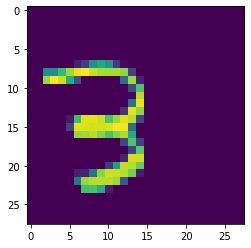

In [353]:
img_scaled = cv2.resize(img_crop_gray_fp, (28, 28), interpolation = cv2.INTER_LINEAR)

image_val = ((1 - img_scaled) * 255).astype(int)

plt.imshow(image_val)
plt.show()

In [354]:
# close the USB camera and HDMI
videoIn.release()
hdmi_out.stop()
del hdmi_out

In [355]:
# grabs the bitstream for the overlay
ol = Overlay("mnist_bd.bit")

In [356]:
hex(ol.lenet_cnn_0.read(0))

'0x4'

In [190]:
help(ol)

Help on Overlay in module pynq.overlay:

<pynq.overlay.Overlay object>
    Default documentation for overlay mnist_bd.bit. The following
    attributes are available on this overlay:
    
    IP Blocks
    ----------
    axi_timer_0          : pynq.overlay.DefaultIP
    lenet_cnn_0          : pynq.overlay.DefaultIP
    processing_system7_0 : pynq.overlay.DefaultIP
    
    Hierarchies
    -----------
    None
    
    Interrupts
    ----------
    None
    
    GPIO Outputs
    ------------
    None
    
    Memories
    ------------
    PSDDR                : Memory



In [191]:
# displays the functions that are used to communicate with the IP
help(ol.lenet_cnn_0)

Help on DefaultIP in module pynq.overlay object:

class DefaultIP(builtins.object)
 |  DefaultIP(description)
 |  
 |  Driver for an IP without a more specific driver
 |  
 |  This driver wraps an MMIO device and provides a base class
 |  for more specific drivers written later. It also provides
 |  access to GPIO outputs and interrupts inputs via attributes. More specific
 |  drivers should inherit from `DefaultIP` and include a
 |  `bindto` entry containing all of the IP that the driver
 |  should bind to. Subclasses meeting these requirements will
 |  automatically be registered.
 |  
 |  Attributes
 |  ----------
 |  mmio : pynq.MMIO
 |      Underlying MMIO driver for the device
 |  _interrupts : dict
 |      Subset of the PL.interrupt_pins related to this IP
 |  _gpio : dict
 |      Subset of the PL.gpio_dict related to this IP
 |  
 |  Methods defined here:
 |  
 |  __init__(self, description)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  read(se

In [192]:
# displays the fields for the control register
ol.ip_dict['lenet_cnn_0']['registers']['CTRL']

{'address_offset': 0,
 'size': 32,
 'access': 'read-write',
 'description': 'Control signals',
 'fields': {'AP_START': {'bit_offset': 0,
   'bit_width': 1,
   'access': 'read-write',
   'description': "Control signal Register for 'ap_start'."},
  'AP_DONE': {'bit_offset': 1,
   'bit_width': 1,
   'access': 'read-only',
   'description': "Control signal Register for 'ap_done'."},
  'AP_IDLE': {'bit_offset': 2,
   'bit_width': 1,
   'access': 'read-only',
   'description': "Control signal Register for 'ap_idle'."},
  'AP_READY': {'bit_offset': 3,
   'bit_width': 1,
   'access': 'read-only',
   'description': "Control signal Register for 'ap_ready'."},
  'RESERVED_1': {'bit_offset': 4,
   'bit_width': 3,
   'access': 'read-only',
   'description': 'Reserved.  0s on read.'},
  'AUTO_RESTART': {'bit_offset': 7,
   'bit_width': 1,
   'access': 'read-write',
   'description': "Control signal Register for 'auto_restart'."},
  'RESERVED_2': {'bit_offset': 8,
   'bit_width': 24,
   'access': 're

In [77]:
# displays the fields for the image pointer buffer register
ol.ip_dict['lenet_cnn_0']['registers']['image_r']

{'address_offset': 16,
 'size': 32,
 'access': 'write-only',
 'description': 'Data signal of image_r',
 'fields': {'image_r': {'bit_offset': 0,
   'bit_width': 32,
   'access': 'write-only',
   'description': 'Bit 31 to 0 Data signal of image_r'}}}

In [59]:
# displays the fields for the parameters pointer buffer register
ol.ip_dict['lenet_cnn_0']['registers']['parameters']

{'address_offset': 24,
 'size': 32,
 'access': 'write-only',
 'description': 'Data signal of parameters',
 'fields': {'parameters': {'bit_offset': 0,
   'bit_width': 32,
   'access': 'write-only',
   'description': 'Bit 31 to 0 Data signal of parameters'}}}

In [60]:
# displays the fields for the fc6_output pointer buffer register
ol.ip_dict['lenet_cnn_0']['registers']['fc6_output']

{'address_offset': 32,
 'size': 32,
 'access': 'write-only',
 'description': 'Data signal of fc6_output',
 'fields': {'fc6_output': {'bit_offset': 0,
   'bit_width': 32,
   'access': 'write-only',
   'description': 'Bit 31 to 0 Data signal of fc6_output'}}}

In [357]:
def read_parameters():
    f = open("params.bin", mode="rb")

    # Reading file data with read() method
    data = f.read()

    data_fp = []

    # parses every 4 bytes as a floating point value
    for i in range(0, len(data), 4):
        fp_num = struct.unpack('f', data[i:i + 4])
        data_fp.append(fp_num[0])

    parameters_data = np.array(data_fp)

    # Closing the opened file
    f.close()
    
    return parameters_data

def read_images():
    f = open("images.bin", mode="rb")
 
    # Reading file data with read() method
    data = f.read()

    data_fp = []

    # parses each byte as a char value
    # skips the first 16 bytes as its a header
    for i in range(16, len(data)):
        char_num = data[i]
        data_fp.append(char_num)

    images_data = np.array(data_fp)

    # Closing the opened file
    f.close()
    
    return images_data

def read_labels():
    f = open("labels.bin", mode="rb")
 
    # Reading file data with read() method
    data = f.read()
    
    data_fp = []

    # parses each byte as a char value
    # skips the first 8 bytes as its a header
    for i in range(8, len(data)):
        char_num = data[i]
        data_fp.append(char_num)

    labels_data = np.array(data_fp)

    # Closing the opened file
    f.close()
    
    return labels_data

In [358]:
# read the parameters, images, and labels
parameters_data = read_parameters()
images_data = read_images()
labels_data = read_labels()

In [269]:
print(len(parameters_data))
print(len(images_data))
print(len(labels_data))

51902
7840000
10000


In [359]:
# allocates the buffers for the parameters, image, and the fully-connected layer
parameters_size = 51902
parameters = allocate(shape=(parameters_size,), dtype=np.single)

image_size = 32 * 32
image = allocate(shape=(image_size,), dtype=np.single)

data_size = 10
fc6_output = allocate(shape=(data_size,), dtype=np.single)

In [360]:
# initializes the parameters buffer with the weights and biases from the trained model
for i in range(len(parameters_data)):
    parameters[i] = parameters_data[i]

In [361]:
def get_image(image_val):
    image = np.zeros((1, 32, 32))
    
    # pads the 28 * 28 image with 2 pixel values of -1 as an outer boarder
    for i in range(32):
        for j in range(32):
            if i < 2 or i > 29 or j < 2 or j > 29:
                image[0, i, j] = -1.0
            else:
                image[0, i, j] = image_val[(i - 2) * 28 + j - 2] / 255.0 * 2.0 - 1.0
    
    return image

In [198]:
def verify_model():
    # sets the address of the buffers for the inputs to the accelerator
    ol.lenet_cnn_0.write(16, image.physical_address)
    ol.lenet_cnn_0.write(24, parameters.physical_address)
    ol.lenet_cnn_0.write(32, fc6_output.physical_address)
    
    num_correct = 0
    
    for k in range(10000):
        # get the image from the dataset
        image_val = images_data[k * 28 * 28:(k + 1) * 28 * 28]
        image_temp = get_image(image_val)

        for i in range(32):
            for j in range(32):
                image[i * 32 + j] = image_temp[0, i, j]
                
        # sets the start bit to start the accelerator
        ol.lenet_cnn_0.write(0, 1)
        
        # wait until the accelerator is done
        while ol.lenet_cnn_0.read(0) & 0x00000002 != 0x2:
            pass
        
        # result is the argmax of the fully-connected layer output
        result = np.argmax(fc6_output)
        
        # compare with the labels
        if result == labels_data[k]:
            num_correct += 1
        
        if k % 250 == 0:
            print("Test images:", k)
    
    # determine the final accuracy
    print("Correct:", num_correct, "Accuracy =", num_correct / 100, "%")

In [57]:
verify_model()

Test images: 0
Test images: 250
Test images: 500
Test images: 750
Test images: 1000
Test images: 1250
Test images: 1500
Test images: 1750
Test images: 2000
Test images: 2250
Test images: 2500
Test images: 2750
Test images: 3000
Test images: 3250
Test images: 3500
Test images: 3750
Test images: 4000
Test images: 4250
Test images: 4500
Test images: 4750
Test images: 5000
Test images: 5250
Test images: 5500
Test images: 5750
Test images: 6000
Test images: 6250
Test images: 6500
Test images: 6750
Test images: 7000
Test images: 7250
Test images: 7500
Test images: 7750
Test images: 8000
Test images: 8250
Test images: 8500
Test images: 8750
Test images: 9000
Test images: 9250
Test images: 9500
Test images: 9750
Correct: 9811 Accuracy = 98.11 %


In [362]:
def inference():
    # sets the address of the buffers for the inputs to the accelerator
    ol.lenet_cnn_0.write(16, image.physical_address)
    ol.lenet_cnn_0.write(24, parameters.physical_address)
    ol.lenet_cnn_0.write(32, fc6_output.physical_address)
    
    image_temp = get_image(image_val.flatten())
    
    for i in range(32):
        for j in range(32):
            image[i * 32 + j] = image_temp[0, i, j]
    
    # sets the start bit to start the accelerator
    ol.lenet_cnn_0.write(0, 1)

    # wait until the accelerator is done
    while ol.lenet_cnn_0.read(0) & 0x00000002 != 0x2:
        pass

    # result is the argmax of the fully-connected layer output
    result = np.argmax(fc6_output)
    
    return result

In [363]:
print(image_val.shape)

result = inference()

print(result)

(28, 28)
3
